## 1. Import Data dan Library yang diperlukan

In [1]:
#import library
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

#import warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
#Melihat isi database olist
conn = sqlite3.connect('olist.db')
list_table = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(list_table)

                                name
0       olist_order_customer_dataset
1                olist_order_dataset
2        olist_order_reviews_dataset
3       olist_order_payments_dataset
4          olist_order_items_dataset
5             olist_products_dataset
6              olist_sellers_dataset
7          olist_geolocation_dataset
8  product_category_name_translation


In [3]:
#Membaca dan mengambil data dari database
conn = sqlite3.connect('olist.db')
query1 = 'SELECT * FROM olist_order_customer_dataset' 
df_customer = pd.read_sql(query1, conn)

query2 = 'SELECT * FROM olist_order_dataset' 
df_orders = pd.read_sql(query2, conn)

query3 = 'SELECT * FROM olist_order_reviews_dataset' 
df_order_reviews = pd.read_sql(query3, conn)

query4 = 'SELECT * FROM olist_order_payments_dataset' 
df_order_payments = pd.read_sql(query4, conn)

query5 = 'SELECT * FROM olist_order_items_dataset' 
df_order_items = pd.read_sql(query5, conn)

query6 = 'SELECT * FROM olist_products_dataset' 
df_product = pd.read_sql(query6, conn)

query7 = 'SELECT * FROM olist_sellers_dataset' 
df_seller = pd.read_sql(query7, conn)

query8 = 'SELECT * FROM olist_geolocation_dataset'
df_geolocation = pd.read_sql(query8, conn)

query9 = 'SELECT * FROM product_category_name_translation'
df_category_translation = pd.read_sql(query9, conn)

## 2. Explorasi dan Pemrosesan Data

### a. Identifikasi NaN

In [4]:
# Cek NaN pada setiap kolom
def check_nan(df):
    nan_counts = df.isnull().sum()
    nan_percentages = (nan_counts / len(df)) * 100
    nan_info = pd.DataFrame({'NaN Counts': nan_counts, 'NaN Percentages': nan_percentages})
    return nan_info

In [5]:
# Cek NaN pada dataframe Olist Customer
nan_info_customer = check_nan(df_customer)
print("Olist Customer:")
print(nan_info_customer)

Olist Customer:
                          NaN Counts  NaN Percentages
index                              0              0.0
customer_id                        0              0.0
customer_unique_id                 0              0.0
customer_zip_code_prefix           0              0.0
customer_city                      0              0.0
customer_state                     0              0.0


In [6]:
# Cek NaN pada dataframe Olist Orders
nan_info_orders = check_nan(df_orders)
print("Olist Orders:")
print(nan_info_orders)

Olist Orders:
                               NaN Counts  NaN Percentages
index                                   0         0.000000
order_id                                0         0.000000
customer_id                             0         0.000000
order_status                            0         0.000000
order_purchase_timestamp                0         0.000000
order_approved_at                     160         0.160899
order_delivered_carrier_date         1783         1.793023
order_delivered_customer_date        2965         2.981668
order_estimated_delivery_date           0         0.000000


In [7]:
# Cek NaN pada dataframe Olist Order Reviews
nan_info_order_reviews = check_nan(df_order_reviews)
print("Olist Order Reviews:")
print(nan_info_order_reviews)

Olist Order Reviews:
                         NaN Counts  NaN Percentages
index                             0         0.000000
review_id                         0         0.000000
order_id                          0         0.000000
review_score                      0         0.000000
review_comment_title          87656        88.341530
review_comment_message        58247        58.702532
review_creation_date              0         0.000000
review_answer_timestamp           0         0.000000


In [8]:
# Cek NaN pada dataframe Olist Order Payments
nan_info_order_payments = check_nan(df_order_payments)
print("Olist Order Payments:")
print(nan_info_order_payments)

Olist Order Payments:
                      NaN Counts  NaN Percentages
index                          0              0.0
order_id                       0              0.0
payment_sequential             0              0.0
payment_type                   0              0.0
payment_installments           0              0.0
payment_value                  0              0.0


In [9]:
# Cek NaN pada dataframe Olist Order Items
nan_info_order_items = check_nan(df_order_items)
print("Olist Order Items:")
print(nan_info_order_items)

Olist Order Items:
                     NaN Counts  NaN Percentages
index                         0              0.0
order_id                      0              0.0
order_item_id                 0              0.0
product_id                    0              0.0
seller_id                     0              0.0
shipping_limit_date           0              0.0
price                         0              0.0
freight_value                 0              0.0


In [10]:
# Cek NaN pada dataframe Olist Product
nan_info_product = check_nan(df_product)
print("Olist Product:")
print(nan_info_product)

Olist Product:
                            NaN Counts  NaN Percentages
index                                0         0.000000
product_id                           0         0.000000
product_category_name              610         1.851234
product_name_lenght                610         1.851234
product_description_lenght         610         1.851234
product_photos_qty                 610         1.851234
product_weight_g                     2         0.006070
product_length_cm                    2         0.006070
product_height_cm                    2         0.006070
product_width_cm                     2         0.006070


In [11]:
# Cek NaN pada dataframe Olist Seller
nan_info_seller = check_nan(df_seller)
print("Olist Seller:")
print(nan_info_seller)

Olist Seller:
                        NaN Counts  NaN Percentages
index                            0              0.0
seller_id                        0              0.0
seller_zip_code_prefix           0              0.0
seller_city                      0              0.0
seller_state                     0              0.0


In [12]:
# Cek NaN pada dataframe Olist Geolocation
nan_info_geolocation = check_nan(df_geolocation)
print("Olist Geolocation:")
print(nan_info_geolocation)

Olist Geolocation:
                             NaN Counts  NaN Percentages
index                                 0              0.0
geolocation_zip_code_prefix           0              0.0
geolocation_lat                       0              0.0
geolocation_lng                       0              0.0
geolocation_city                      0              0.0
geolocation_state                     0              0.0


In [13]:
# Cek NaN pada dataframe Product Category Name Translation
nan_info_category_translation = check_nan(df_category_translation)
print("Product Category Name Translation:")
print(nan_info_category_translation)

Product Category Name Translation:
                               NaN Counts  NaN Percentages
index                                   0              0.0
product_category_name                   0              0.0
product_category_name_english           0              0.0


NaN atau Null Value tidak terlalu besar. Dibawah tiga persen pada masing-masing tabel. Kecuali pada tabel **Olist Order Reviews** tepatnya pada kolom ``review_comment_title`` 88.34% dan ``review_comment_message`` 58.70%. Hal ini bisa ditoleransi karena tidak semua customer memberikan review berupa komentar, kebanyakan hanya memberikan review berupa nilai (1-5) saja.

Dari sini saya rasa datanya sudah cukup bagus. Tidak perlu dilakukan modifikasi pada NaN.


### b. Identifikasi Outlier

Setelah melakukan pengecekan pada semua data, didapatkan outlier pada dua kolom, yaitu:
- Order payment = payment value
- Order Items = Price

In [14]:
print(df_order_items.describe())

               index  order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000  112650.000000
mean    56324.500000       1.197834     120.653739      19.990320
std     32519.398249       0.705124     183.633928      15.806405
min         0.000000       1.000000       0.850000       0.000000
25%     28162.250000       1.000000      39.900000      13.080000
50%     56324.500000       1.000000      74.990000      16.260000
75%     84486.750000       1.000000     134.900000      21.150000
max    112649.000000      21.000000    6735.000000     409.680000


In [15]:
print(df_order_payments.describe())

              index  payment_sequential  payment_installments  payment_value
count  103886.00000       103886.000000         103886.000000  103886.000000
mean    51942.50000            1.092679              2.853349     154.100380
std     29989.44937            0.706584              2.687051     217.494064
min         0.00000            1.000000              0.000000       0.000000
25%     25971.25000            1.000000              1.000000      56.790000
50%     51942.50000            1.000000              1.000000     100.000000
75%     77913.75000            1.000000              4.000000     171.837500
max    103885.00000           29.000000             24.000000   13664.080000


In [16]:
# Fungsi untuk menampilkan histogram
def plot_histogram(df, columns):
    plt.figure(figsize=(10, 4))
    for i, column in enumerate(columns):
        plt.subplot(1, 2, i+1)
        df[column].plot(kind='hist', bins=20, edgecolor='black')
        plt.title(f'Histogram - {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
    plt.tight_layout()
    plt.show()

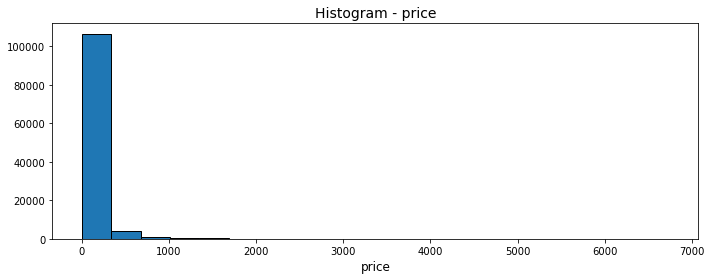

In [17]:
# Menampilkan histogram
plt.figure(figsize=(10, 4))
column = 'price'
plt.hist(df_order_items[column], bins=20, edgecolor='black')
plt.title(f'Histogram - {column}', fontsize=14)
plt.xlabel(column, fontsize=12)
plt.tight_layout()
#plt.savefig("img/2-b-his-price-bf.jpeg")
plt.show()

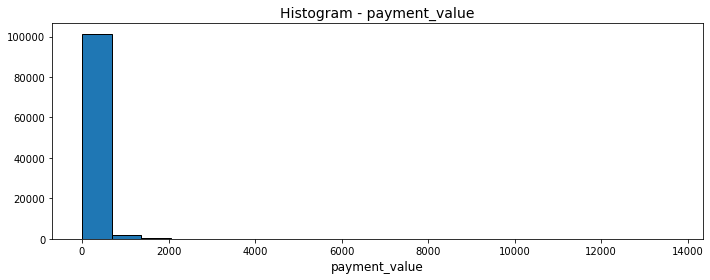

In [18]:
# Menampilkan histogram
plt.figure(figsize=(10, 4))
column = 'payment_value'
plt.hist(df_order_payments[column], bins=20, edgecolor='black')
plt.title(f'Histogram - {column}', fontsize=14)
plt.xlabel(column, fontsize=12)
plt.tight_layout()
#plt.savefig("img/2-b-his-payment-bf.jpeg")
plt.show()

In [19]:
# Fungsi untuk menghapus outlier menggunakan metode IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

In [20]:
# Menghapus outlier pada dataframe Olist Order Items
outlier_columns_order_items = ['price', 'freight_value']
for column in outlier_columns_order_items:
    df_order_items = remove_outliers_iqr(df_order_items, column)

# Menghapus outlier pada dataframe Olist Order Payments
outlier_columns_order_payments = ['payment_installments', 'payment_value']
for column in outlier_columns_order_payments:
    df_order_payments = remove_outliers_iqr(df_order_payments, column)

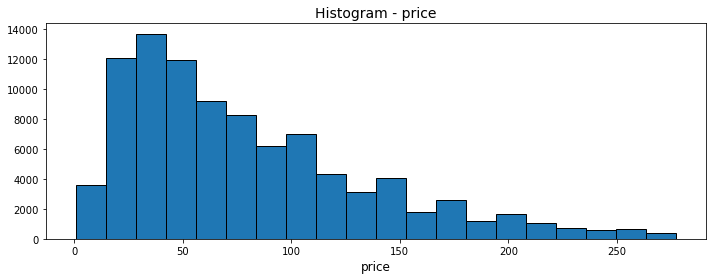

In [21]:
# Menampilkan histogram
plt.figure(figsize=(10, 4))
column = 'price'
plt.hist(df_order_items[column], bins=20, edgecolor='black')
plt.title(f'Histogram - {column}', fontsize=14)
plt.xlabel(column, fontsize=12)
plt.tight_layout()
#plt.savefig("img/2-b-his-price-af.jpeg")
plt.show()

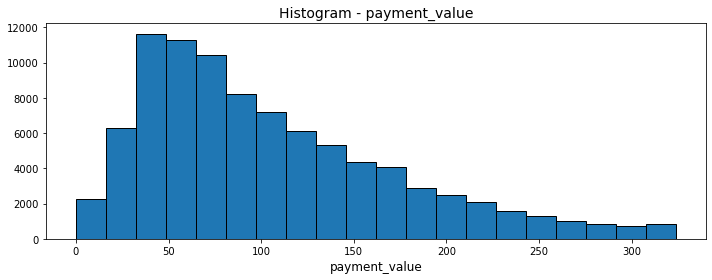

In [22]:
# Menampilkan histogram
plt.figure(figsize=(10, 4))
column = 'payment_value'
plt.hist(df_order_payments[column], bins=20, edgecolor='black')
plt.title(f'Histogram - {column}', fontsize=14)
plt.xlabel(column, fontsize=12)
plt.tight_layout()
#plt.savefig("img/2-b-his-payment-af.jpeg")
plt.show()

### c. Identifikasi Inconsistent format

Setelah melakukan beberapa pengecekan sepertinya semua format sudah sesuai. Tidak ada inconsistent format yang harus diperbaiki.


Berikut beberapa contohnya:

In [23]:
df_order_reviews.review_score.value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

In [24]:
df_order_payments.payment_type.value_counts()

credit_card    65448
boleto         18342
voucher         5674
debit_card      1436
not_defined        3
Name: payment_type, dtype: int64

In [25]:
df_geolocation.geolocation_city.value_counts()

sao paulo         135800
rio de janeiro     62151
belo horizonte     27805
são paulo          24918
curitiba           16593
                   ...  
boa sorte              1
bacurituba             1
pintópolis             1
batinga                1
silvano                1
Name: geolocation_city, Length: 8011, dtype: int64

### d. Identifikasi duplicate data

In [26]:
# Cek duplikasi dalam dataframe dan tampilkan jumlah duplikasi
def check_duplicates(df):
    duplicated_rows = df[df.duplicated()]
    print("Jumlah Data Terduplikasi:", len(duplicated_rows))
    return duplicated_rows

In [27]:
# Menampilkan data yang terduplikasi dalam setiap dataframe
print("Olist Customer - Data Terduplikasi:")
duplicates_customer = check_duplicates(df_customer)
print(duplicates_customer)

Olist Customer - Data Terduplikasi:
Jumlah Data Terduplikasi: 0
Empty DataFrame
Columns: [index, customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []


In [28]:
print("Olist Geolocation - Data Terduplikasi:")
duplicates_geolocation = check_duplicates(df_geolocation)
print(duplicates_geolocation)

Olist Geolocation - Data Terduplikasi:
Jumlah Data Terduplikasi: 0
Empty DataFrame
Columns: [index, geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state]
Index: []


In [29]:
print("Olist Order Items - Data Terduplikasi:")
duplicates_order_items = check_duplicates(df_order_items)
print(duplicates_order_items)


Olist Order Items - Data Terduplikasi:
Jumlah Data Terduplikasi: 0
Empty DataFrame
Columns: [index, order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []


In [30]:
print("Olist Order Payments - Data Terduplikasi:")
duplicates_order_payments = check_duplicates(df_order_payments)
print(duplicates_order_payments)

Olist Order Payments - Data Terduplikasi:
Jumlah Data Terduplikasi: 0
Empty DataFrame
Columns: [index, order_id, payment_sequential, payment_type, payment_installments, payment_value]
Index: []


In [31]:
print("Olist Order Reviews - Data Terduplikasi:")
duplicates_order_reviews = check_duplicates(df_order_reviews)
print(duplicates_order_reviews)

Olist Order Reviews - Data Terduplikasi:
Jumlah Data Terduplikasi: 0
Empty DataFrame
Columns: [index, review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp]
Index: []


In [32]:
print("Olist Orders - Data Terduplikasi:")
duplicates_orders = check_duplicates(df_orders)
print(duplicates_orders)

Olist Orders - Data Terduplikasi:
Jumlah Data Terduplikasi: 0
Empty DataFrame
Columns: [index, order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []


In [33]:
print("Olist Product - Data Terduplikasi:")
duplicates_product = check_duplicates(df_product)
print(duplicates_product)

Olist Product - Data Terduplikasi:
Jumlah Data Terduplikasi: 0
Empty DataFrame
Columns: [index, product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []


In [34]:
print("Olist Seller - Data Terduplikasi:")
duplicates_seller = check_duplicates(df_seller)
print(duplicates_seller)

Olist Seller - Data Terduplikasi:
Jumlah Data Terduplikasi: 0
Empty DataFrame
Columns: [index, seller_id, seller_zip_code_prefix, seller_city, seller_state]
Index: []


### e. Parsing Data

Parsing data dilakukan untuk mengubah data yang seharusnya bertipe date time tetapi masih bertipe teks atau objek. Setelah melakukan pengecekan diperlukan melakukan parsing data pada tabel dan kolom berikut:

- ``df_orders['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date']``
- ``df_order_reviews['review_creation_date', 'review_answer_timestamp']``
- ``df_order_items['shipping_limit_date']``


In [35]:
df_orders.dtypes

index                             int64
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [36]:
df_order_reviews.dtypes

index                       int64
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [37]:
df_order_items.dtypes

index                    int64
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [38]:
datetime_columns_orders = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                           'order_delivered_customer_date', 'order_estimated_delivery_date']

# Parsing data pada kolom tanggal dan waktu dalam Olist Orders
for column in datetime_columns_orders:
    df_orders[column] = pd.to_datetime(df_orders[column])
    
# Menampilkan informasi setelah parsing data
print("Informasi setelah parsing data:")
print("Tipe Data Olist Orders:")
print(df_orders.dtypes)

Informasi setelah parsing data:
Tipe Data Olist Orders:
index                                     int64
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


In [39]:
datetime_columns_order_reviews = ['review_creation_date', 'review_answer_timestamp']

# Parsing data pada kolom tanggal dan waktu dalam Olist Order Reviews
for column in datetime_columns_order_reviews:
    df_order_reviews[column] = pd.to_datetime(df_order_reviews[column])
    
# Menampilkan informasi setelah parsing data
print("Informasi setelah parsing data:")
print("\nTipe Data Olist Order Reviews:")
print(df_order_reviews.dtypes)

Informasi setelah parsing data:

Tipe Data Olist Order Reviews:
index                               int64
review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object


In [40]:
datetime_columns_order_items = ['shipping_limit_date']

# Parsing data pada kolom tanggal dan waktu dalam Olist Order Items
for column in datetime_columns_order_items:
    df_order_items[column] = pd.to_datetime(df_order_items[column])
    
# Menampilkan informasi setelah parsing data
print("Informasi setelah parsing data:")
print("\nTipe Data Olist Order Items:")
print(df_order_items.dtypes)

Informasi setelah parsing data:

Tipe Data Olist Order Items:
index                           int64
order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object


## 3. Analisa Data

### a. Total Penjualan per Bulan

In [41]:
# Menggabungkan tabel Olist Orders dengan Olist Order Payments
df_order_and_payment = pd.merge(df_orders, df_order_payments, on='order_id')

# Mengambil bulan dan tahun dari kolom order_purchase_timestamp
df_order_and_payment ['month_year'] = df_order_and_payment['order_purchase_timestamp'].dt.to_period('M')

# Menghitung total pembayaran (payment_value) per bulan
monthly_sales = df_order_and_payment.groupby('month_year')['payment_value'].sum()

# Menampilkan tabel total penjualan per bulan
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df.columns = ['Bulan', 'Total Penjualan']
print(monthly_sales_df)

      Bulan  Total Penjualan
0   2016-09           252.24
1   2016-10         28772.97
2   2016-12            19.62
3   2017-01         69837.27
4   2017-02        162321.58
5   2017-03        249165.89
6   2017-04        225747.15
7   2017-05        328022.50
8   2017-06        291018.96
9   2017-07        361054.14
10  2017-08        397374.80
11  2017-09        404721.63
12  2017-10        446662.47
13  2017-11        691479.50
14  2017-12        556693.83
15  2018-01        716586.70
16  2018-02        650087.29
17  2018-03        701746.18
18  2018-04        698260.59
19  2018-05        683058.82
20  2018-06        613641.21
21  2018-07        624079.02
22  2018-08        625365.81
23  2018-09          1758.89
24  2018-10           589.67


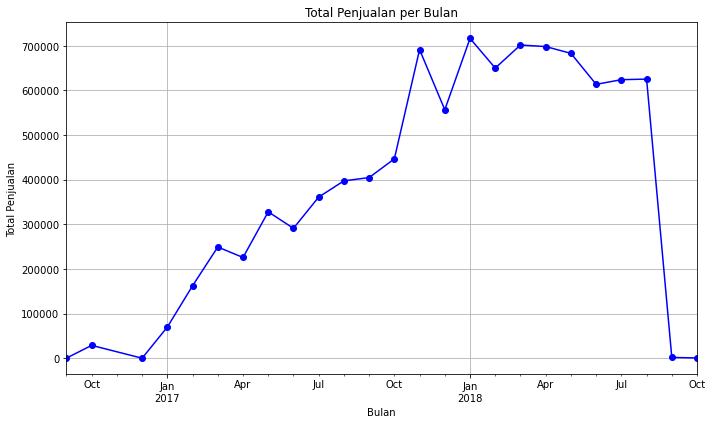

In [42]:
# Menampilkan visualisasi grafik penjualan bulanan
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Total Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.grid(True)
#plt.savefig("img/3-a-penjualan-perbulan.jpeg")
plt.tight_layout()
plt.show()



Penjualan cenderung meningkat selama tahun 2017 sampai bulan Agustus tahun 2018. Selama delapan bulan pertama di tahun 2018 penjualan selalu lebih dari 600000. Paling tinggi pada bulan Januari 2018 sebesar 716586.

### b. Kategori Produk dengan Pendapatan Tertinggi

In [43]:
# Menggabungkan tabel Olist Order Items dengan Olist Product
df_items_product = pd.merge(df_order_items, df_product, on='product_id')

# Menggabungkan dengan tabel Product Category Name Translation
df_items_product_eng = pd.merge(df_items_product, df_category_translation, on='product_category_name', how='left')

# Menghitung total pendapatan (price) per kategori produk
category_revenue = df_items_product_eng.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(10)

# Menampilkan tabel pendapatan tertinggi per kategori produk
category_revenue_df = category_revenue.reset_index()
category_revenue_df.columns = ['Kategori Produk', 'Pendapatan']
print(category_revenue_df)

         Kategori Produk  Pendapatan
0         bed_bath_table   855796.19
1         sports_leisure   636280.08
2          health_beauty   627342.29
3  computers_accessories   580770.74
4          watches_gifts   524937.85
5        furniture_decor   484217.30
6             housewares   393481.80
7             cool_stuff   344459.62
8                   toys   296425.09
9                   auto   289458.83


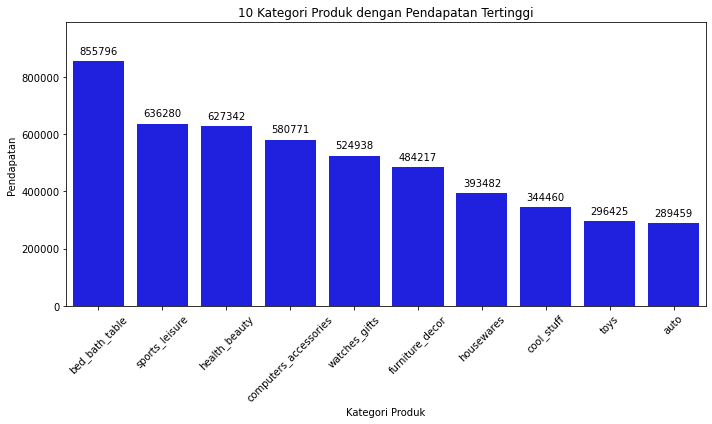

In [50]:
# Menampilkan visualisasi grafik pendapatan tertinggi per kategori produk
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=category_revenue.index, y=category_revenue.values, color='b')
ax.set_title('10 Kategori Produk dengan Pendapatan Tertinggi')
ax.set_xlabel('Kategori Produk')
ax.set_ylabel('Pendapatan')

# Menambahkan label value pada bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.xticks(rotation=45)
plt.ylim([0, 990000])
plt.tight_layout()
#plt.savefig("img/3-b-kategori-tertinggi.jpeg")
plt.show()



Setelah mengetahui apa saja kategori dengan pendapatan tertinggi kita bisa menambah jumlah atau variasi produk pada kategori dengan pendapatan tertinggi.

### c. 10 Kota dengan penjualan tertinggi

In [45]:
# Menggabungkan tabel Olist Orders dengan Olist Customer
df_order_customer = pd.merge(df_orders, df_customer, on='customer_id')

# Menggabungkan dengan tabel Olist Order Payment
df_order_and_payment = pd.merge(df_order_customer, df_order_payments, on='order_id')

# Menghitung total penjualan (payment_value) per kota pelanggan
city_sales = df_order_and_payment.groupby('customer_city')['payment_value'].sum().sort_values(ascending=False)

# Mengambil 10 kota dengan total penjualan tertinggi
top_10_cities = city_sales.head(10)

# Menampilkan tabel penjualan per kota
top_10_cities_df = top_10_cities.reset_index()
top_10_cities_df.columns = ['Kota', 'Total Penjualan']
print(top_10_cities_df)


             Kota  Total Penjualan
0       sao paulo       1403019.53
1  rio de janeiro        682553.15
2  belo horizonte        267245.75
3        brasilia        208885.50
4        curitiba        143343.87
5    porto alegre        137494.12
6        campinas        128861.22
7        salvador        122180.35
8       guarulhos        110828.79
9         niteroi         90292.46


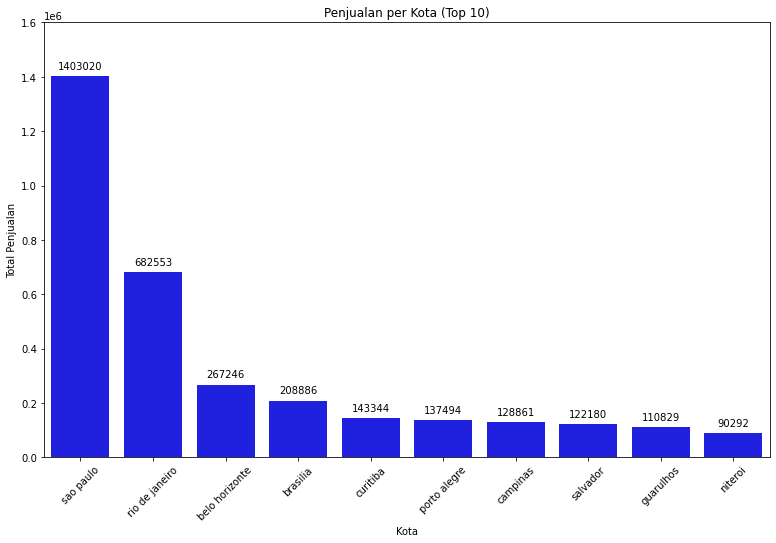

In [51]:
# Menampilkan visualisasi grafik penjualan per kota
plt.figure(figsize=(13, 8))
ax = sns.barplot(x=top_10_cities.index, y=top_10_cities.values, color='b')
ax.set_title('Penjualan per Kota (Top 10)')
ax.set_xlabel('Kota')
ax.set_ylabel('Total Penjualan')

# Menambahkan label value pada bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xticks(rotation=45)
plt.ylim([0, 1600000])
#plt.savefig("img/3-c-penjulan-perkota.jpeg")
plt.show()

Kota dengan penjalan teringgi adalah Sao Paulo (1403019) dan Rio de Janeiro (682553) berbeda jauh dengan kota-kota lainnya. DI kedua kota ini kita bisa menambah promo agar lebih banyak penjualan dan mengantisipasi agar tidak kehabisan produk.

### d. Metode Pembayaran yang paling diminati

In [47]:
# Menggabungkan tabel Olist Orders dan Olist Order Payments berdasarkan order_id
merged_data = pd.merge(df_orders, df_order_payments, on='order_id')

# Menghitung jumlah transaksi menggunakan setiap metode pembayaran
payment_counts = merged_data['payment_type'].value_counts()

# Menampilkan metode pembayaran dengan jumlah transaksi tertinggi
print(payment_counts)

credit_card    65448
boleto         18342
voucher         5674
debit_card      1436
not_defined        3
Name: payment_type, dtype: int64


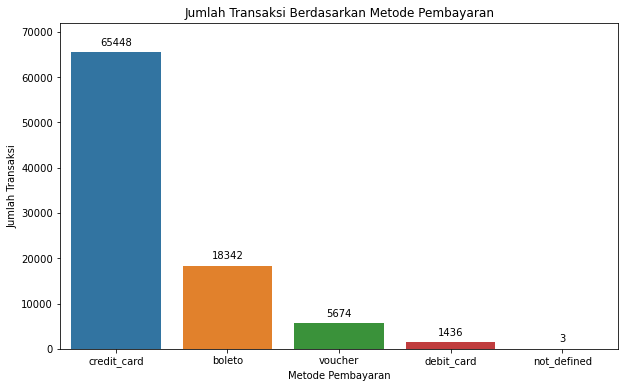

In [52]:
# Membuat plot bar menggunakan seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=payment_counts.index, y=payment_counts.values)
ax.set_title('Jumlah Transaksi Berdasarkan Metode Pembayaran')
ax.set_xlabel('Metode Pembayaran')
ax.set_ylabel('Jumlah Transaksi')

# Menambahkan label value pada bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.ylim([0, 72000])
#plt.savefig("img/3-d-metode-pembayaran.jpg")
plt.show()



Pembayaran yang paling diminati adalah Credit Card. Selanjutnya kita bisa mengoptimalkan dan menambahkan promo-promo atau voucher bagi customer yang melakukan pembayaran dengan metode Credit Card.